In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scipy
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')

#### Printing the first few rows of the data

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Checking the data types and information about each columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that there are total of 7043 entries in the dataset and there is numeric and categorical data in the datasets

#### Check if there are any null values in the dataset

In [5]:
data.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

We can see that all the query output is False which means there is no null values in the dataset

#### Cleaning the dataset

In [6]:
print(data['TotalCharges'])

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object


In [7]:
print('Data type of TotalCharges column in the dataset:',data['TotalCharges'].dtype)

Data type of TotalCharges column in the dataset: object


We can see that the DataType of the TotalCharges column is 'object' datatype but the values in the column is of float type. Thus we clean this up and change the data type to 'float64'

In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace = True)

In [9]:
print('Data type of TotalCharges column in the dataset is changed to:',data['TotalCharges'].dtype)

Data type of TotalCharges column in the dataset is changed to: float64


### Exploratory Data Analysis

We identify the churn based on the Contracts of each customer. We will see the percentage of customers being churned based on the contractual details

In [10]:
contractChurnData = data.groupby(['Contract', 'Churn']).count()['customerID']

In [11]:
monthlyContract = contractChurnData['Month-to-month']['Yes']/(contractChurnData['Month-to-month']['No'] + contractChurnData['Month-to-month']['Yes'])
yearlyContract = contractChurnData['One year']['Yes']/(contractChurnData['One year']['No'] + contractChurnData['One year']['Yes'])
twoYearContract = contractChurnData['Two year']['Yes']/(contractChurnData['Two year']['No'] + contractChurnData['Two year']['Yes'])

In [12]:
contractTypes = data['Contract'].unique().tolist()
churnPercentage = [monthlyContract*100, yearlyContract*100, twoYearContract*100]

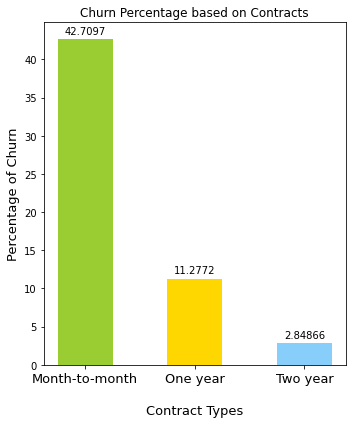

In [13]:
fig, ax = plt.subplots(figsize=(5,6))

colors = ['yellowgreen', 'gold', 'lightskyblue']
x = np.arange(len(contractTypes))  # the label locations
rects1 = ax.bar(x, churnPercentage, color=colors, width = 0.5)
ax.set_ylabel('Percentage of Churn', fontsize = 13)
ax.set_xlabel('\nContract Types', fontsize = 13)
ax.set_title('Churn Percentage based on Contracts')
ax.set_xticks(x)
ax.set_xticklabels(contractTypes)
ax.bar_label(rects1, padding=3)
plt.xticks(fontsize = 13)
fig.tight_layout()
plt.show()

We have used the Churn and Contract Types within the dataset to get the churn percentage based on contractual details. First, the dataset is grouped by the 'Contract Types' and 'Churn' to get the total counts for each contract type with respective churn details. And then the percentage of Churn with 'Yes' as their values is calculated and then plotted.

We can see from the bar chart that those having the contract of Month-to-Month tend to churn the highest (around 42.7%) followed by the customers with contract of One year (around 11.27%). The customers with the contracts of Two year have the least churn percentage which is around 2.84%.

From this analysis, the business owner can get idea that he/she should be marketing to the customers to have contract types which are of longer terms so that the customers churn ratio is least.

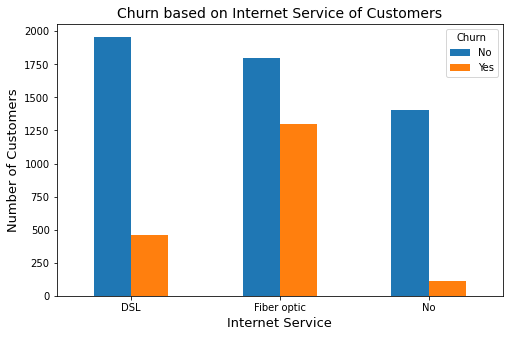

In [14]:
data.groupby(['InternetService','Churn']).size().unstack().plot(kind = 'bar', figsize = (8,5))
plt.xlabel('Internet Service', fontsize = 13)
plt.ylabel('Number of Customers', fontsize = 13)
plt.title('Churn based on Internet Service of Customers', fontsize = 14)
plt.xticks(rotation = 0)
plt.show()

We can see that the churn rate is higher for the customers having the Fiber Optic as their internet service.

In [15]:
PaymentMethodChurnData = data.groupby(['PaymentMethod', 'Churn']).count()['customerID']

In [16]:
ElectronicCheck = PaymentMethodChurnData['Electronic check']['Yes']/(PaymentMethodChurnData['Electronic check']['No'] + PaymentMethodChurnData['Electronic check']['Yes'])
MailedCheck = PaymentMethodChurnData['Mailed check']['Yes']/(PaymentMethodChurnData['Mailed check']['No'] + PaymentMethodChurnData['Mailed check']['Yes'])
BankTransfer = PaymentMethodChurnData['Bank transfer (automatic)']['Yes']/(PaymentMethodChurnData['Bank transfer (automatic)']['No'] + PaymentMethodChurnData['Bank transfer (automatic)']['Yes'])
CreditCard  = PaymentMethodChurnData['Credit card (automatic)']['Yes']/(PaymentMethodChurnData['Credit card (automatic)']['No'] + PaymentMethodChurnData['Credit card (automatic)']['Yes'])

In [17]:
PaymentMethods = data['PaymentMethod'].unique().tolist()
churnPercentage = [ElectronicCheck*100, MailedCheck*100, BankTransfer*100, CreditCard*100]

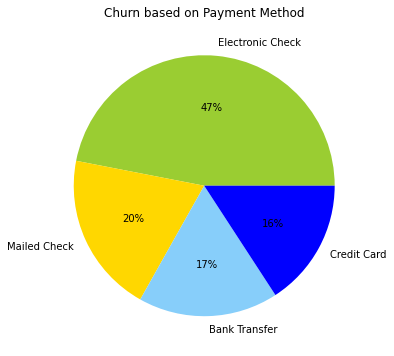

In [18]:
plt.figure(figsize=[10,6])
labels = ['Electronic Check', 'Mailed Check', 'Bank Transfer', 'Credit Card']
colors = ['yellowgreen', 'gold', 'lightskyblue','blue']
plt.pie(churnPercentage,autopct='%.0f%%',labels = labels,colors = colors)
plt.title("Churn based on Payment Method")
plt.show()

It is clear from the figure the churn rate is high for those people who used to pay using an electronic check. This percentage is 47%. The second-biggest contribution is the mailed check, which has a 20% share. The other two ways, “bank transfer”, and “Credit Card” have 17% and 16% respectively. 

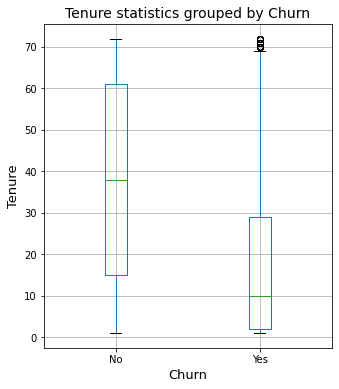

In [20]:
data.boxplot(column = 'tenure', by = 'Churn', figsize = (5,6))
plt.title('Tenure statistics grouped by Churn', fontsize = 14)
plt.xlabel('Churn', fontsize = 13)
plt.ylabel('Tenure', fontsize = 13)
plt.suptitle('')
plt.show()

We have used the Tenure parameter in the dataset to see if the Churn depends upon the number of months the customer has stayed with the company. We can see that the stretch of the box plot with Churn equal to No is greater compared to the stretch of box plot with Churn equal to Yes. It means that the customers who have are kept attached to the business for long time, no matter if they purchase anything or not, are less likely to churn. From this, we can say that the business owners should create marketing campaigns which would keep audience intact for longer period of time.

### Data Processing

We will now process our data and use the one hot encoding technique to convert our categorical data into separated columns. This will help us to train our model as training categorical data without any pre-processing is not possible.

In [21]:
categoricalData = pd.get_dummies(data.drop(['customerID'],axis = 1)).drop(['Churn_No'], axis=1)
categoricalData.rename(columns = {'Churn_Yes': 'Churn'}, inplace = True)

In [22]:
categoricalData

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,1,0,0,0,1,0,0,0,1,1


In [23]:
print('The data with Churn equal to "0" is', categoricalData['Churn'].value_counts()[0])
print('The data with Churn equal to "1" is', categoricalData['Churn'].value_counts()[1])

The data with Churn equal to "0" is 5163
The data with Churn equal to "1" is 1869


For making any prediction model, the data should be balanced so that there is no overfitting or underfitting. We can see from our above analysis that there is a huge class imbalance in the dataset as the length of data with Churn (1) is 1869 and the length of data with Churn (0) is 5163. 

###### Note: Here 0 means the customers with Churn equal to No, and 1 means the customers with Churn equal to Yes

Therefore, we balance the distribution by making the length of labels equal.

In [24]:
shuffledData = categoricalData.sample(frac=1)
ChurnLength = categoricalData['Churn'].value_counts()[1]

balancedData = pd.concat([categoricalData.loc[categoricalData['Churn'] == 1], 
                          categoricalData.loc[categoricalData['Churn'] == 0][:ChurnLength]])

categoricalData = balancedData.sample(frac = 1, random_state = 0)

In [25]:
print('The data with Churn equal to "0" is', categoricalData['Churn'].value_counts()[0])
print('The data with Churn equal to "1" is', categoricalData['Churn'].value_counts()[1])

The data with Churn equal to "0" is 1869
The data with Churn equal to "1" is 1869


### Model Training

In [26]:
features = categoricalData.drop('Churn', axis = 1)
label = categoricalData['Churn']

Splitting the dataset into training and test dataset to build a machine learning model for the predictive analysis

In [27]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=0)

In [28]:
print('The shape of training features is:', X_train.shape)
print('The shape of testing features is:', X_test.shape)

The shape of training features is: (2616, 45)
The shape of testing features is: (1122, 45)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import f1_score

#### Machine Learning Model 1 : Logistic Regression

In [30]:
logisticRegression = LogisticRegression(solver='lbfgs', max_iter=400)

logisticRegression.fit(X_train, y_train)
y_pred = logisticRegression.predict(X_test)

print('Overall accuracy of Logistic Regression is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')

Overall accuracy of Logistic Regression is: 75.4 %


#### Machine Learning Model 2 : SVM

In [31]:
SVM = svm.SVC()

SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

print('Overall accuracy of Support Vector Machine model is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')

Overall accuracy of Support Vector Machine model is: 62.12 %


#### Machine Learning Model 3 : Decision Trees

In [32]:
decisionTrees = DecisionTreeClassifier(max_depth = 2)

decisionTrees.fit(X_train, y_train)
y_pred = decisionTrees.predict(X_test)

print('Overall accuracy of Support Vector Machine model is:', round(metrics.accuracy_score(y_test, y_pred)*100,2), '%')

Overall accuracy of Support Vector Machine model is: 73.08 %


We can see that the Logistic regression outperforms the other machine learning models for the training on our dataset. This model prediction is done to help the business owners to predict the Churn of their customers. If the owner wants to predict in future and the company has sufficient data of its customers then it can detect if the customer will churn or not in the future. This predictive analysis plays an important role in the industries to help the businesses grow.